# Analyzing renting price in kamloops region

## The price data will be scraped from kijiji website

In [921]:
from bs4 import BeautifulSoup
import urllib.request
import numpy as np
import matplotlib.pyplot as plt
import time
import math

# Get Renting data from kijiji website

pc=[]
renting_info=[]
startLink='https://www.kijiji.ca/v-house-rental/kamloops'
for i in range(10):
    url='https://www.kijiji.ca/b-house-rental/kamloops/page-'+str(i)+'/c43l1700227'
    with urllib.request.urlopen(url) as response:
        html_doc = response.read()
        sp = BeautifulSoup(html_doc, 'html.parser')
        prices=sp.select('.price')
        links=sp.select('.title a')        
        for i in range(len(sp.select('.price'))):
            rent_price = prices[i].get_text().strip().strip('$').replace(',','')
            mlink=startLink+links[i].get('href')
            with urllib.request.urlopen(mlink) as response:
                html_doc = response.read()
                soup = BeautifulSoup(html_doc, 'html.parser')
                features = soup.select('.attributeValue-1550499923')
                try:
                    bedrooms = features[0].get_text()
                except:
                    bedrooms = 'Not Available'
                try:
                    bathrooms = features[1].get_text()
                except:
                    bathrooms = 'Not Available'
#                 try:
#                     furnished = features[2].get_text()
#                 except:
#                     furnished = 'Not Availabel'
#                 try:
#                     petfriendly = features[3].get_text()
#                 except:
#                     petfriendly = 'Not Availabel'
                try:
                    location = soup.select('.address-2932131783')[0].get_text()
                except:
                    location='Not Availabel'
                print(rent_price,bedrooms,bathrooms,location)
                renting_info.append({'price':rent_price, 'bedrooms':bedrooms,'bathrooms':bathrooms,'location':location })
                time.sleep(1)
    time.sleep(2)

renting_info

rent_info=pd.DataFrame(renting_info)

rent_info.head(10)

rent_info.to_csv('rent_info_kamloops.'+str(int(time.time()))+'.csv', sep=',',header=None)

# Processing Data

In [922]:
pd.read_csv('rent_info_kamloops.1528247317.csv', names = ["bathrooms", "bedrooms", "location", "price"]).head(5)

,bathrooms,bedrooms,location,price
0,1 bathroom,2 bedrooms,"Linthorpe Road, Kamloops V2B 7S3 BC",1525.00
1,2 bathrooms,3 bedrooms,"Merritt, BC V1K0B2, Canada",Please Contact
2,2 bathrooms,3 bedrooms,", Kamloops V2B 3T9 BC",1800.00
3,2 bathrooms,4 bedrooms,"Ave NE, Salmon Arm, BC V1E 3G4, Canada",2800.00
4,1 bathroom,2 bedrooms,"Kamloops, BC V2B 3K5, Canada",950.00


In [923]:
read_in_rent_info=pd.read_csv('rent_info_kamloops.1528247317.csv', names = ["bathrooms", "bedrooms", "location", "price"])

In [924]:
read_in_rent_info.head(5)

,bathrooms,bedrooms,location,price
0,1 bathroom,2 bedrooms,"Linthorpe Road, Kamloops V2B 7S3 BC",1525.00
1,2 bathrooms,3 bedrooms,"Merritt, BC V1K0B2, Canada",Please Contact
2,2 bathrooms,3 bedrooms,", Kamloops V2B 3T9 BC",1800.00
3,2 bathrooms,4 bedrooms,"Ave NE, Salmon Arm, BC V1E 3G4, Canada",2800.00
4,1 bathroom,2 bedrooms,"Kamloops, BC V2B 3K5, Canada",950.00


In [925]:
read_in_rent_info.tail(5)

,bathrooms,bedrooms,location,price
205,2 bathrooms,3 bedrooms,", Kamloops V2E 1E9 BC, Canada",Please Contact
206,1.5 bathrooms,3 bedrooms,"460 Dalgleish Dr, Kamloops, BC V2C 5W7, Canada",1550.00
207,2 bathrooms,3 bedrooms,", Kamloops V2B 3E1 BC, Canada",1400.00
208,3 bathrooms,4 bedrooms,", kamloops v2c1k7 BC, Canada",2650.00
209,No,1 bathroom,", Kamloops V1S 1A3 BC, Canada",2500.00


## Remove bedrooms info not provided records

In [926]:
level_one_cleaned = read_in_rent_info[read_in_rent_info.bedrooms!='No']

In [927]:
level_one_cleaned.head(5)

,bathrooms,bedrooms,location,price
0,1 bathroom,2 bedrooms,"Linthorpe Road, Kamloops V2B 7S3 BC",1525.00
1,2 bathrooms,3 bedrooms,"Merritt, BC V1K0B2, Canada",Please Contact
2,2 bathrooms,3 bedrooms,", Kamloops V2B 3T9 BC",1800.00
3,2 bathrooms,4 bedrooms,"Ave NE, Salmon Arm, BC V1E 3G4, Canada",2800.00
4,1 bathroom,2 bedrooms,"Kamloops, BC V2B 3K5, Canada",950.00


In [928]:
len(read_in_rent_info)

210

## Remove price info not provided records

In [929]:
level_two_cleaned = level_one_cleaned[read_in_rent_info.price != 'Please Contact']

In [930]:
level_two_cleaned.head(5)

,bathrooms,bedrooms,location,price
0,1 bathroom,2 bedrooms,"Linthorpe Road, Kamloops V2B 7S3 BC",1525.00
2,2 bathrooms,3 bedrooms,", Kamloops V2B 3T9 BC",1800.00
3,2 bathrooms,4 bedrooms,"Ave NE, Salmon Arm, BC V1E 3G4, Canada",2800.00
4,1 bathroom,2 bedrooms,"Kamloops, BC V2B 3K5, Canada",950.00
5,1 bathroom,3 bedrooms,"Airfield Rd, Barrière, BC V0E 1E0, Canada",1800.00


In [931]:
len(level_two_cleaned)

154

In [932]:
level_two_cleaned.iloc[0][1]

'2 bedrooms'

In [933]:
level_two_cleaned.iloc[0][0]

'1 bathroom'

In [934]:
for i in range(len(level_two_cleaned)):
    level_two_cleaned.iloc[i][0]=level_two_cleaned.iloc[i][0].strip('bathrooms ')
    level_two_cleaned.iloc[i][1]=level_two_cleaned.iloc[i][1].strip('bedrooms bath bedrooms and den')

In [935]:
level_two_cleaned.head(10)

,bathrooms,bedrooms,location,price
0,1,2,"Linthorpe Road, Kamloops V2B 7S3 BC",1525.00
2,2,3,", Kamloops V2B 3T9 BC",1800.00
3,2,4,"Ave NE, Salmon Arm, BC V1E 3G4, Canada",2800.00
4,1,2,"Kamloops, BC V2B 3K5, Canada",950.00
5,1,3,"Airfield Rd, Barrière, BC V0E 1E0, Canada",1800.00
6,1,1,"992 Columbia St, Kamloops, BC V2C 2V9, Canada",1200.00
8,1,2,"2082 Westsyde Rd, Kamloops, BC V2B 7C2, Canada",1050.00
9,1,1,"2215 Doubletree Crescent, Kamloops, BC V2B 6E6...",1100.00
10,4,6,"1924 Gloaming Dr, Kamloops, BC V1S 1R2, Canada",2300.00
12,1,2,"1657 Selwyn Rd, Kamloops, BC V2E 1P1, Canada",1400.00


In [936]:
for i in range(len(level_two_cleaned)):
    if(level_two_cleaned.iloc[i][1]=='Bachelor or studi'):
        level_two_cleaned.iloc[i][1]=1
    else:
        level_two_cleaned.iloc[i][1]=int(level_two_cleaned.iloc[i][1])

In [937]:
for i in range(len(level_two_cleaned)):
    try:
        level_two_cleaned.iloc[i][0]=math.floor(int(level_two_cleaned.iloc[i][0]))
    except:
        level_two_cleaned.iloc[i][0]=1

In [938]:
level_two_cleaned.head(5)

,bathrooms,bedrooms,location,price
0,1,2,"Linthorpe Road, Kamloops V2B 7S3 BC",1525.00
2,2,3,", Kamloops V2B 3T9 BC",1800.00
3,2,4,"Ave NE, Salmon Arm, BC V1E 3G4, Canada",2800.00
4,1,2,"Kamloops, BC V2B 3K5, Canada",950.00
5,1,3,"Airfield Rd, Barrière, BC V0E 1E0, Canada",1800.00


In [939]:
len(level_two_cleaned)

154

In [940]:
bathroom_numbers=level_two_cleaned.iloc[:,0]

In [941]:
bedroom_numbers=level_two_cleaned.iloc[:,1]

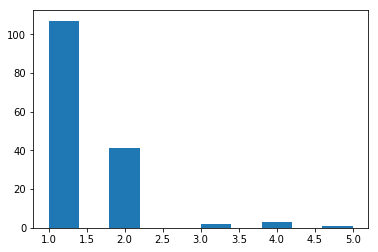

In [942]:
plt.hist(bathroom_numbers)
plt.show()

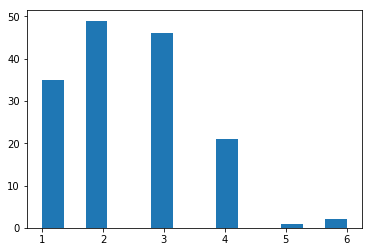

In [943]:
plt.hist(bedroom_numbers, bins='auto')
plt.show()

# Analyzing bedroom number price relationship

In [944]:
level_two_cleaned.head(5)

,bathrooms,bedrooms,location,price
0,1,2,"Linthorpe Road, Kamloops V2B 7S3 BC",1525.00
2,2,3,", Kamloops V2B 3T9 BC",1800.00
3,2,4,"Ave NE, Salmon Arm, BC V1E 3G4, Canada",2800.00
4,1,2,"Kamloops, BC V2B 3K5, Canada",950.00
5,1,3,"Airfield Rd, Barrière, BC V0E 1E0, Canada",1800.00


# Convert price to number type

In [945]:
level_two_cleaned.iloc[0,3]

'1525.00'

In [946]:
for i in range(len(level_two_cleaned)):
    level_two_cleaned.iloc[i,3]=float(level_two_cleaned.iloc[i,3])

/Users/xiaosheng/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:141: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/xiaosheng/anaconda/lib/python3.5/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [947]:
level_two_cleaned.head(5)

,bathrooms,bedrooms,location,price
0,1,2,"Linthorpe Road, Kamloops V2B 7S3 BC",1525
2,2,3,", Kamloops V2B 3T9 BC",1800
3,2,4,"Ave NE, Salmon Arm, BC V1E 3G4, Canada",2800
4,1,2,"Kamloops, BC V2B 3K5, Canada",950
5,1,3,"Airfield Rd, Barrière, BC V0E 1E0, Canada",1800


In [948]:
level_two_cleaned.to_csv('cleaned_data.csv',sep=',',header=None )

In [949]:
cleaned_data=pd.read_csv('cleaned_data.csv',  names = ["bathrooms", "bedrooms", "location", "price"])

In [950]:
cleaned_data.head(5)

,bathrooms,bedrooms,location,price
0,1,2,"Linthorpe Road, Kamloops V2B 7S3 BC",1525.0
2,2,3,", Kamloops V2B 3T9 BC",1800.0
3,2,4,"Ave NE, Salmon Arm, BC V1E 3G4, Canada",2800.0
4,1,2,"Kamloops, BC V2B 3K5, Canada",950.0
5,1,3,"Airfield Rd, Barrière, BC V0E 1E0, Canada",1800.0


In [951]:
len(cleaned_data)

154

In [952]:
cleaned_data.iloc[0,1]

2

In [953]:
cleaned_data.iloc[0,3]

1525.0

In [1008]:
bedroom_price_pair={}
for i in range(len(cleaned_data)):
    if(cleaned_data.iloc[i,1] in bedroom_price_pair):
        bedroom_price_pair[cleaned_data.iloc[i,1]].append(cleaned_data.iloc[i,3])
    else:
        bedroom_price_pair[cleaned_data.iloc[i,1]] =[cleaned_data.iloc[i,3]]

## Analyzing one bedroom housing 

In [1009]:
len(bedroom_price_pair[1])

35

In [1010]:
np.mean(bedroom_price_pair[1])

992.17142857142858

In [1011]:
np.max(bedroom_price_pair[1])

2500.0

In [1012]:
np.min(bedroom_price_pair[1])

1.0

In [1013]:
bedroom_price_pair[1].index(1)

11

In [1014]:
del bedroom_price_pair[1][11]

In [1015]:
np.min(bedroom_price_pair[1])

300.0

## Average price for one room

In [1016]:
np.mean(bedroom_price_pair[1])

1021.3235294117648

### Price distribution for one room

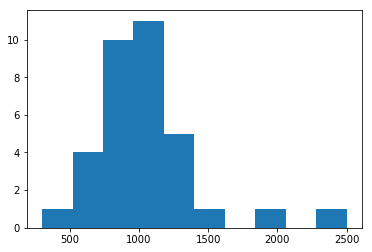

In [1017]:
plt.hist(bedroom_price_pair[1])
plt.show()

## Analyzing two bedroom housing 

In [1018]:
len(bedroom_price_pair[2])

49

In [1019]:
np.max(bedroom_price_pair[2])

1650.0

In [1020]:
np.min(bedroom_price_pair[2])

585.0

In [1021]:
np.mean(bedroom_price_pair[2])

1323.7755102040817

## Average price for one room at renting two bedroom house

In [1022]:
np.mean(bedroom_price_pair[2])/2

661.88775510204084

### Price distribution for one room

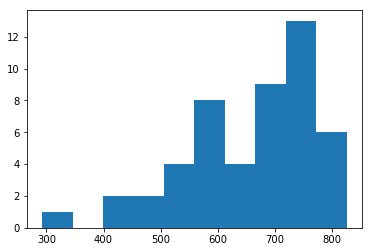

In [1023]:
one_bedroom_price=[]
for val in bedroom_price_pair[2]:
    one_bedroom_price.append(val/2)
plt.hist(one_bedroom_price)
plt.show()

## Analyzing three bedroom housing 

In [1024]:
len(bedroom_price_pair[3])

46

In [1025]:
np.mean(bedroom_price_pair[3])

1779.7826086956522

In [1026]:
np.max(bedroom_price_pair[3])

2500.0

In [1027]:
np.min(bedroom_price_pair[3])

1250.0

## Average price for one room at renting three bedroom house

In [1028]:
np.mean(bedroom_price_pair[3])/3

593.26086956521738

### Price distribution for one room

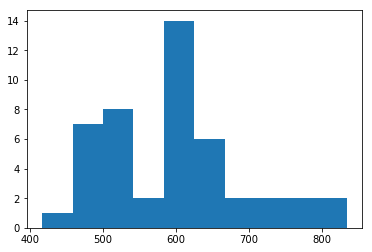

In [1029]:
one_bedroom_price=[]
for val in bedroom_price_pair[3]:
    one_bedroom_price.append(val/3)
plt.hist(one_bedroom_price)
plt.show()

## Analyzing four bedroom housing 

In [1030]:
len(bedroom_price_pair[4])

21

In [1031]:
np.mean(bedroom_price_pair[4])

2228.8095238095239

In [1032]:
np.max(bedroom_price_pair[4])

3250.0

In [1033]:
np.min(bedroom_price_pair[4])

1600.0

## Average price for one room at renting four bedroom house

In [1034]:
np.mean(bedroom_price_pair[4])/4

557.20238095238096

### Price distribution for one room

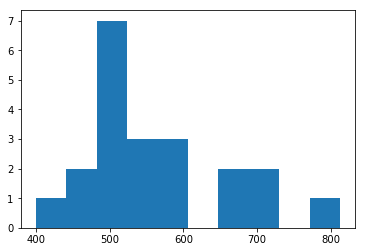

In [1035]:
one_bedroom_price=[]
for val in bedroom_price_pair[4]:
    one_bedroom_price.append(val/4)
plt.hist(one_bedroom_price)
plt.show()

## Analyzing five bedroom housing 

In [1036]:
len(bedroom_price_pair[5])

1

In [1037]:
np.mean(bedroom_price_pair[5])

1850.0

In [1038]:
np.max(bedroom_price_pair[5])

1850.0

In [1039]:
np.min(bedroom_price_pair[5])

1850.0

## Average price for one room at renting five bedroom house

In [1040]:
np.mean(bedroom_price_pair[5])/5

370.0

### Price distribution for one room

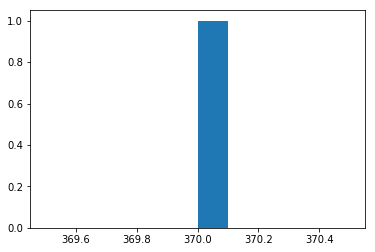

In [1041]:
one_bedroom_price=[]
for val in bedroom_price_pair[5]:
    one_bedroom_price.append(val/5)
plt.hist(one_bedroom_price)
plt.show()

# Conclusion

We can expect that on average in Kamloops region it costs an individule less if rent a house with more rooms.

Note:<br>
    ```` Above analysis did not consider the number of bathrooms and location relationship to house renting price

This is a personal project on scraping data from web and analyzing data
